Capstone project  for Machine Learning.

What are the risk factors and for  diabetes and age group for early detection. 

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('diabetes_prediction_dataset.csv', sep = ',')

In [4]:
data.info()
data.head()
data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

EXPLORATORY DATA ANALYSIS

In [5]:

duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [6]:
# Checking null values
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
# Loop through each column and count the number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


Removing Duplicates  

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
rows , col =  data.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 96146 
Number of Columns : 9


In [10]:
data.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.00,96146.00,96146.00,96146.00,96146.00,96146.00,96146.00
mean,41.79,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


Data Visulization. 

After the Clean up of Data we do extensive Data Visulization to identify the Paterns


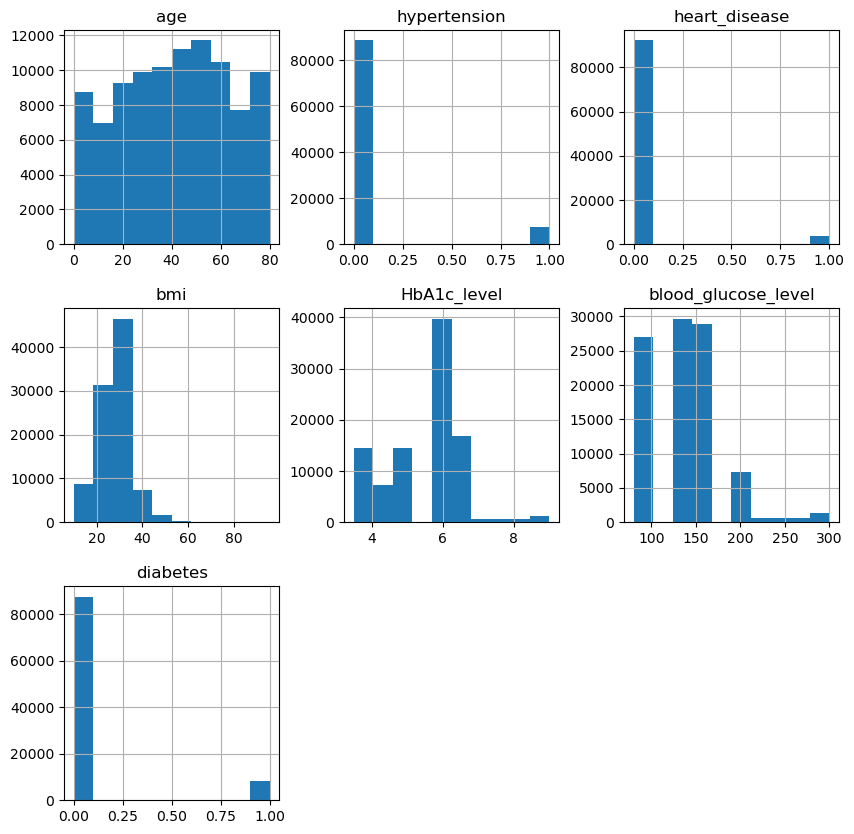

In [12]:
data.hist(figsize = (10,10))
plt.show()

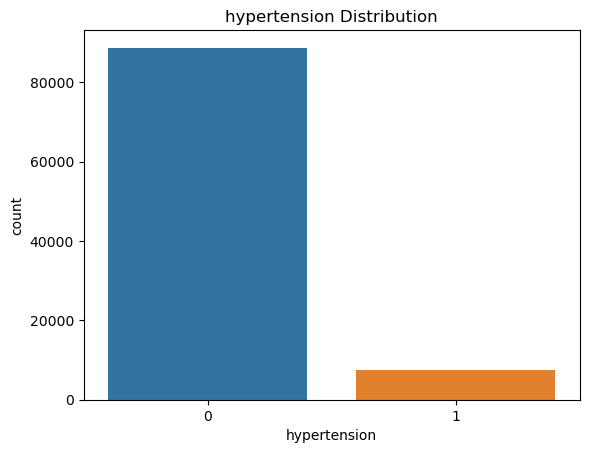

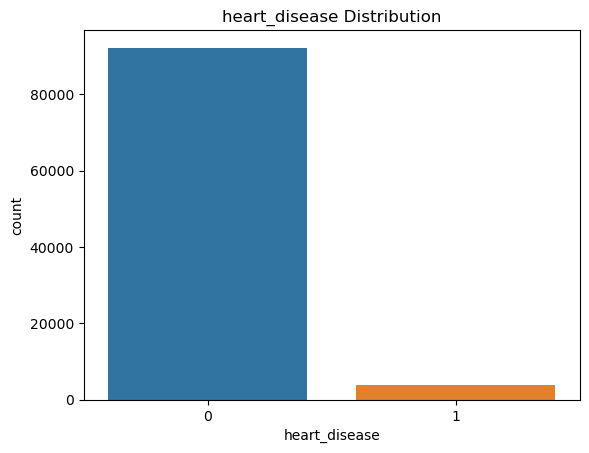

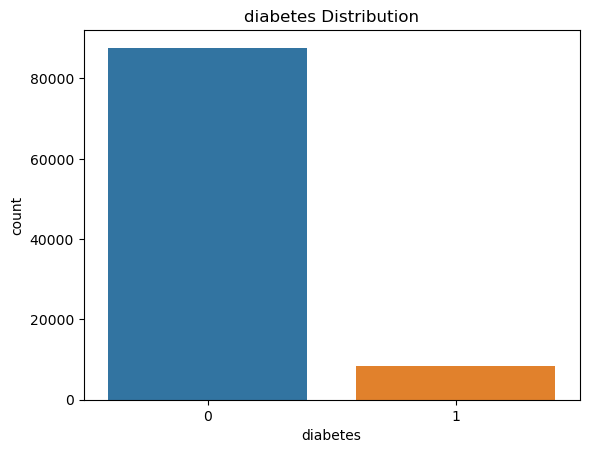

In [13]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=data)
    plt.title(f'{col} Distribution')
    plt.show()

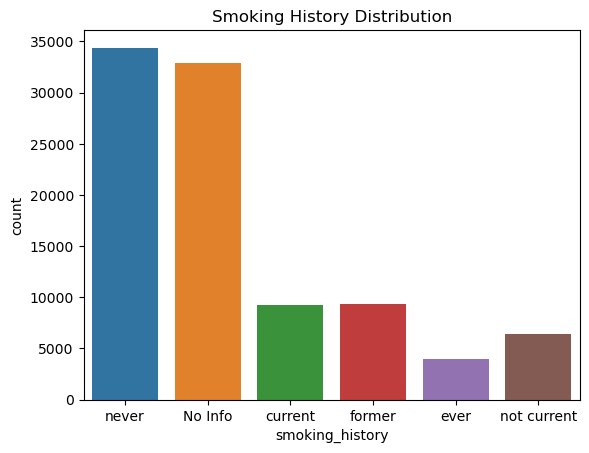

In [14]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=data)
plt.title('Smoking History Distribution')
plt.show()

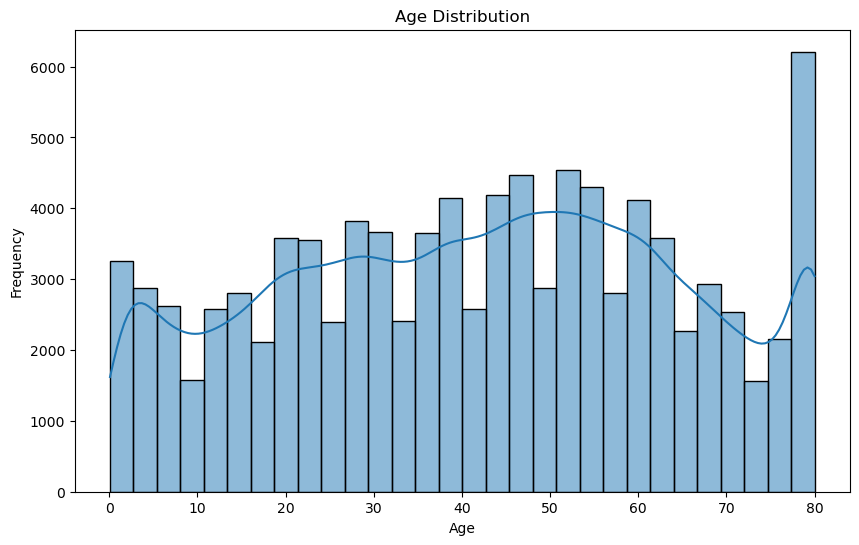

In [15]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

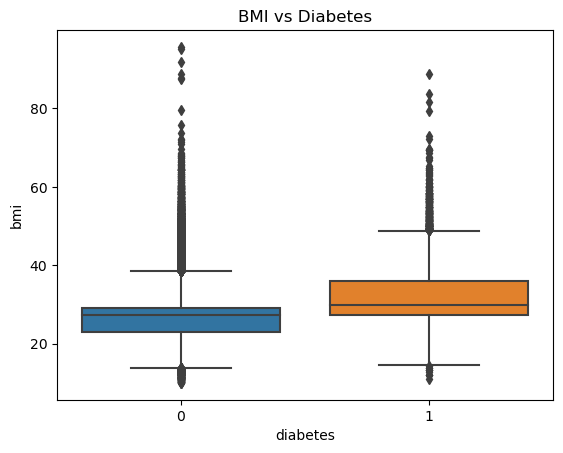

In [16]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('BMI vs Diabetes')
plt.show()

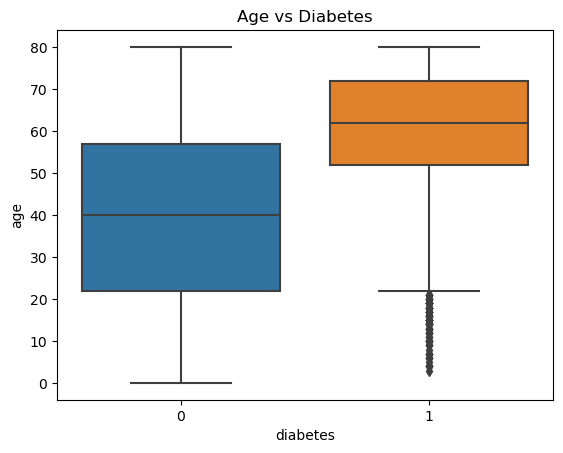

In [17]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Age vs Diabetes')
plt.show()

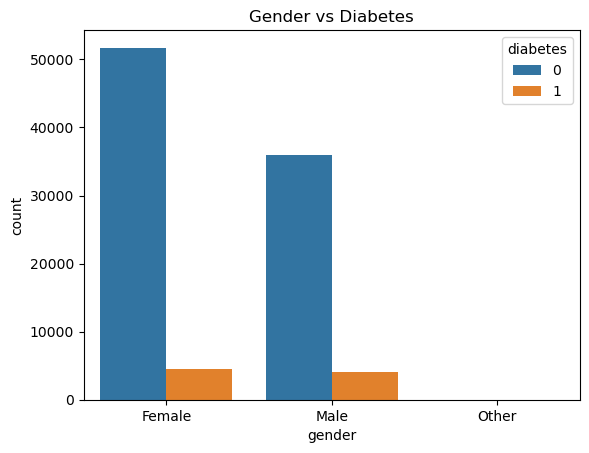

In [18]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=data)
plt.title('Gender vs Diabetes')
plt.show()

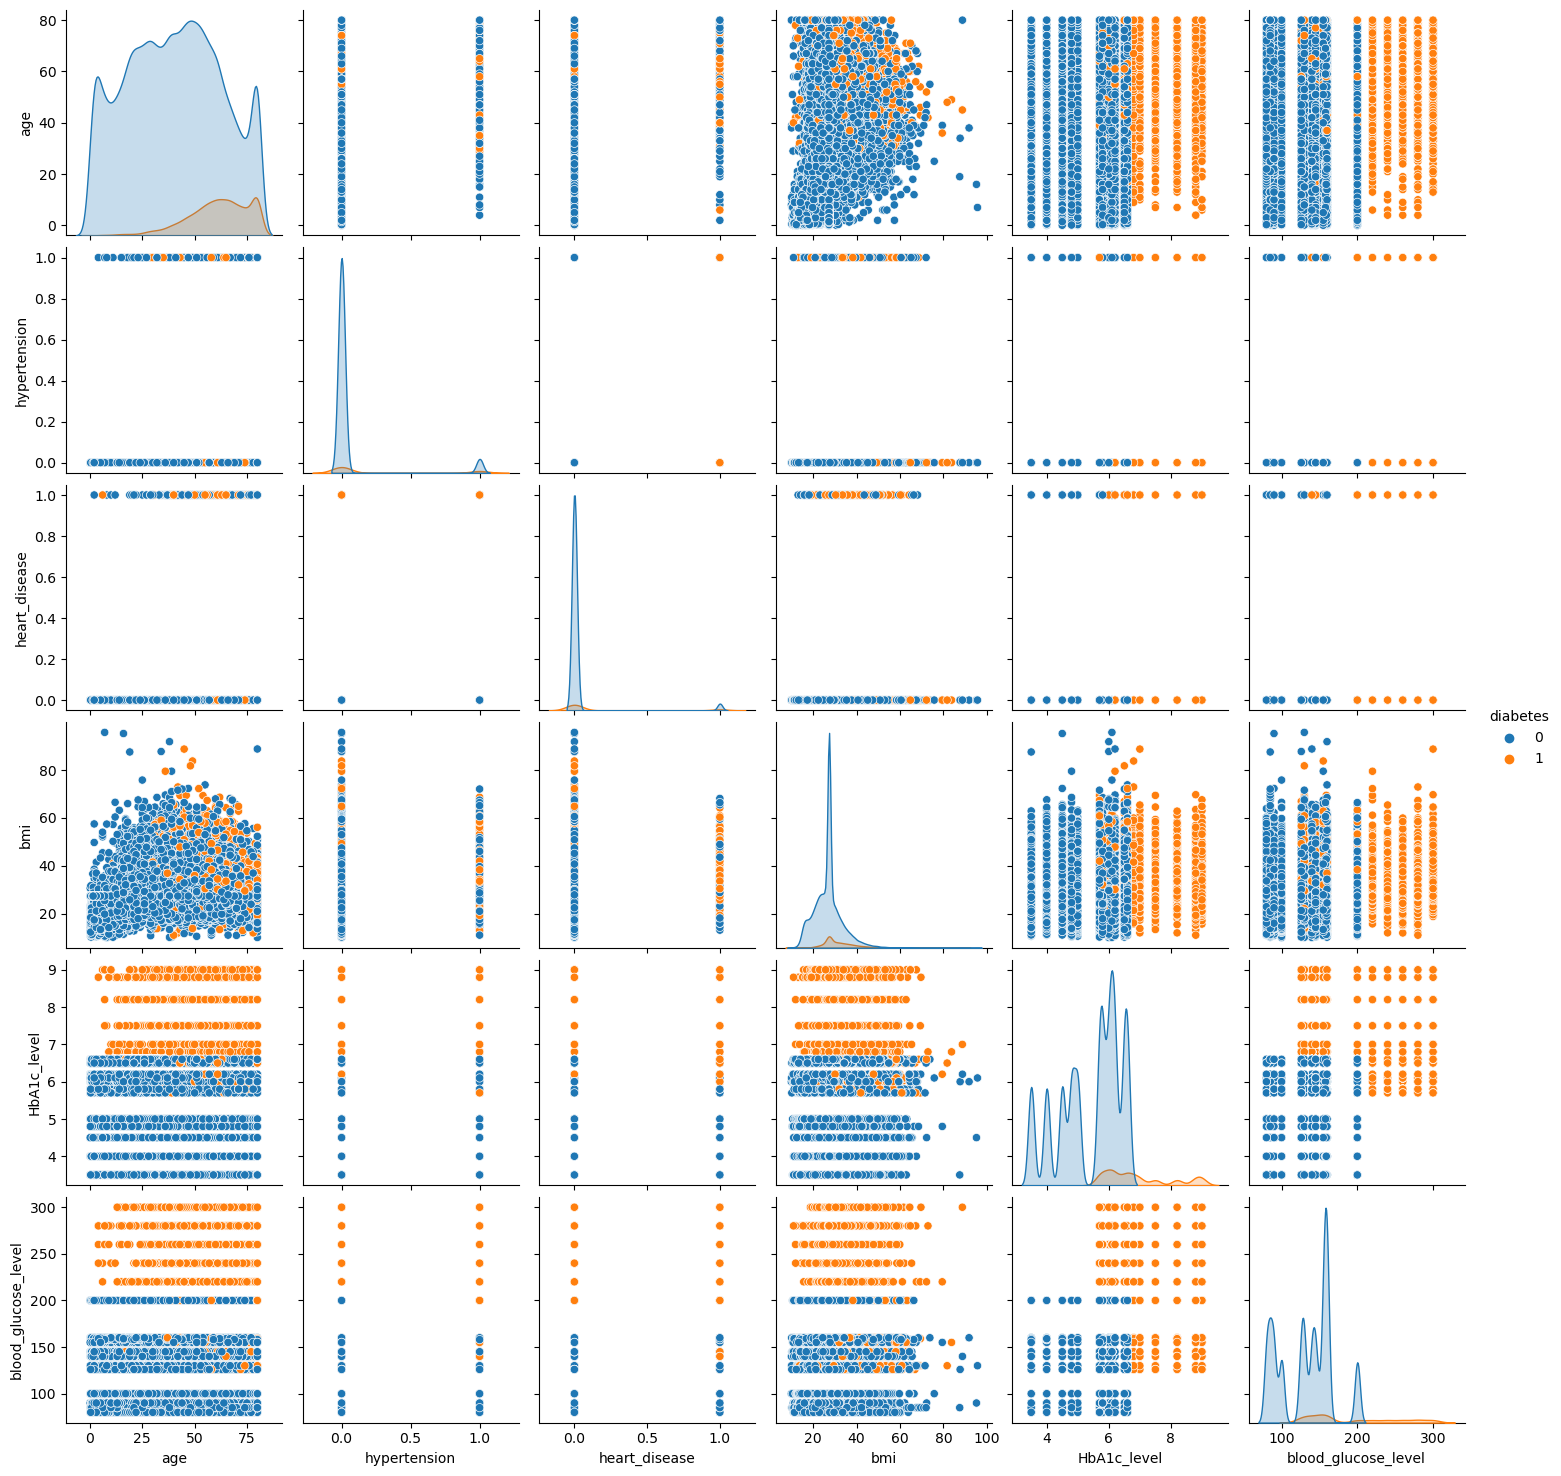

In [19]:
# Pair plot for numeric features
sns.pairplot(data, hue='diabetes')
plt.show()

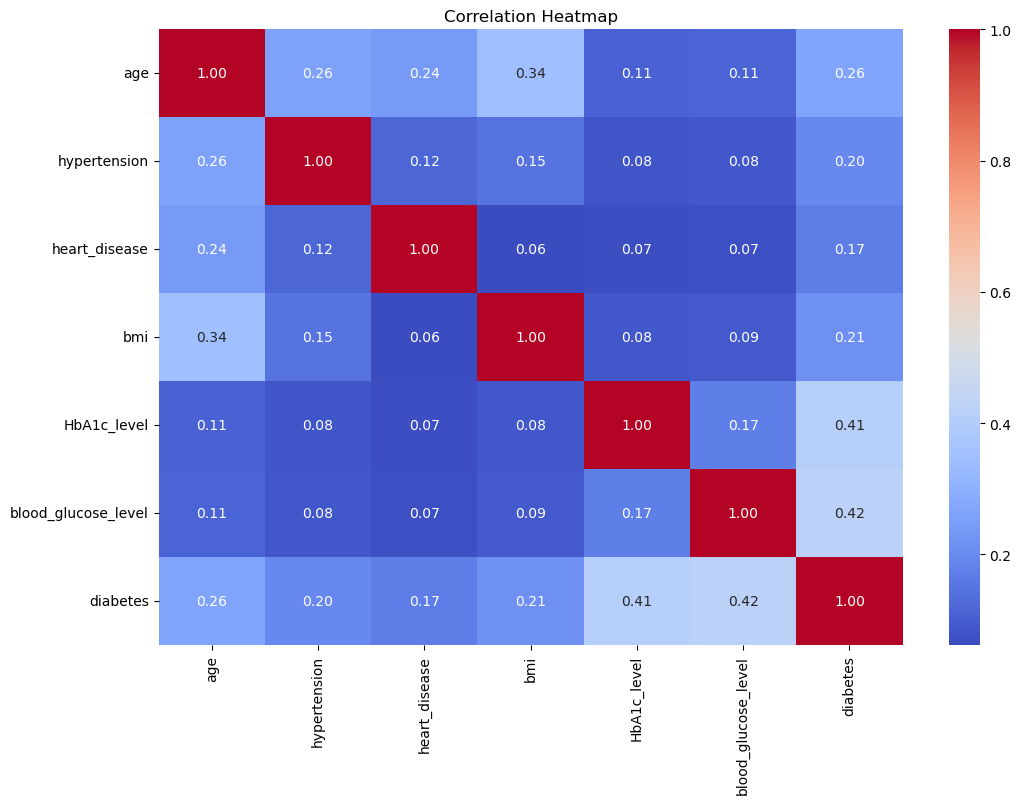

In [20]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
data['smoking_history'] = data['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(data['smoking_history'].value_counts())

smoking_history
non-smoker     67285
past_smoker    19664
current         9197
Name: count, dtype: int64


In [53]:
from sklearn.preprocessing import LabelEncoder
df =data.copy()
lablel = LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns :
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=lablel.fit_transform(df[column])

In [54]:
df.info()
df.head()
df.count()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int32  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int32  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.6 MB


gender                 96146
age                    96146
hypertension           96146
heart_disease          96146
smoking_history        96146
bmi                    96146
HbA1c_level            96146
blood_glucose_level    96146
diabetes               96146
dtype: int64

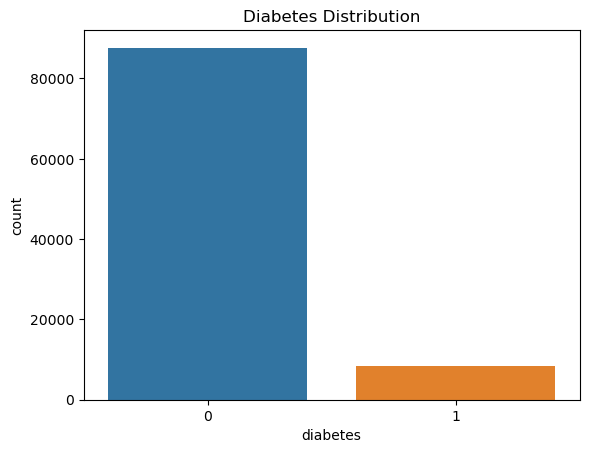

In [24]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=data)
plt.title('Diabetes Distribution')
plt.show()

In [55]:
X = data[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'hypertension']]
y = data['diabetes']

X1 = df.drop('diabetes',axis=1)
Y1 =df['diabetes']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

model2 = LogisticRegression()
model2.fit(X1_train, y1_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [59]:
model.score(X_test, y_test)

0.9596983879355174

In [ ]:
y1_pred = model2.predict(X1_test)

In [ ]:
model2.score(X1)

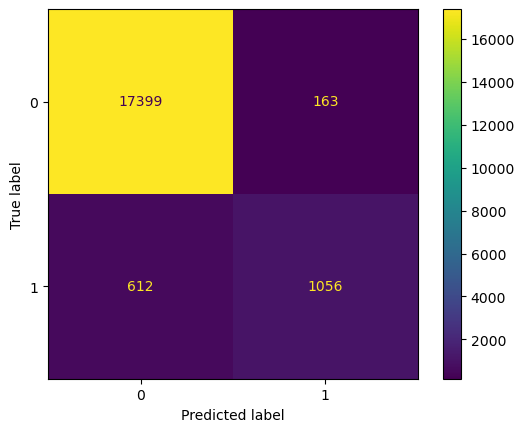

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Model Building and Hyperparameter Tuning

A pipeline is constructed which first applies the preprocessing steps and then trains a model on the data. We use a RandomForestClassifier, which is a popular and powerful algorithm for classification tasks. The model's hyperparameters are tuned using GridSearchCV , which performs an exhaustive search over the specified parameter values for the estimator. The best performing model is selected based on cross-validation.

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
model_2.score(X_train,y_train)

0.9968017057569296

Accuracy: 99.68%
Accuracy: 96.70%


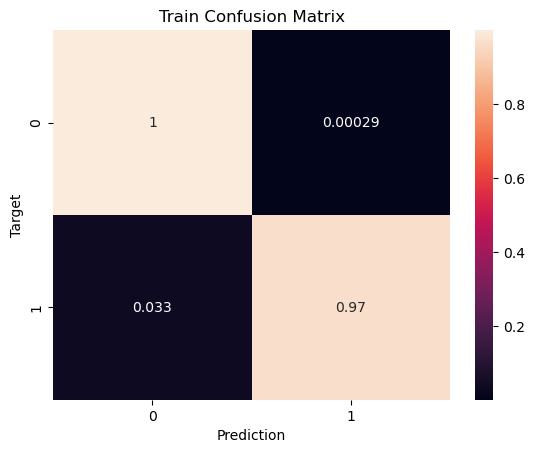

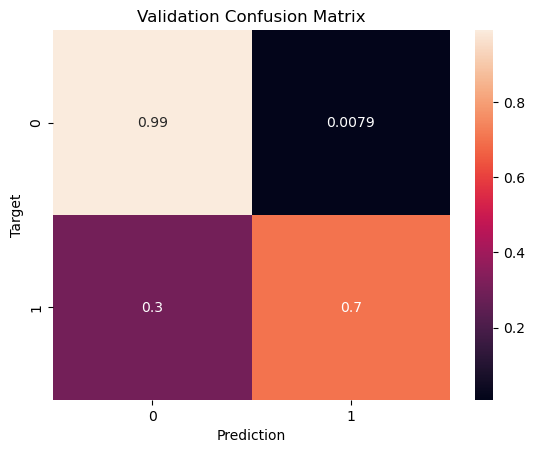

In [48]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.9707863123407353
Validation Accuracy: 0.9720748829953199
